In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import numpy as np

## Load the  Data

In [2]:
train_dev_data = pd.read_csv('Dataset/Swissprot_Train_Validation_dataset.csv')

Take a Quick Look at the Data Structure

In [3]:
train_dev_data.head()

,ACC,Kingdom,Partition,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,Q28165,Metazoa,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,Q86U42,Metazoa,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,Q0GA42,Metazoa,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,P82349,Metazoa,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,Q7L5N1,Metazoa,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...


## Check For Missing Values

In [4]:
def plot_missing_values(data : pd.DataFrame):
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    missing_percentage = missing_percentage[missing_percentage > 0]  # Only columns with missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Columns with Missing Values')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values in Columns')
    plt.tight_layout()
    plt.show()

C:\Users\wadkr\AppData\Local\Temp\ipykernel_29276\1281583051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')


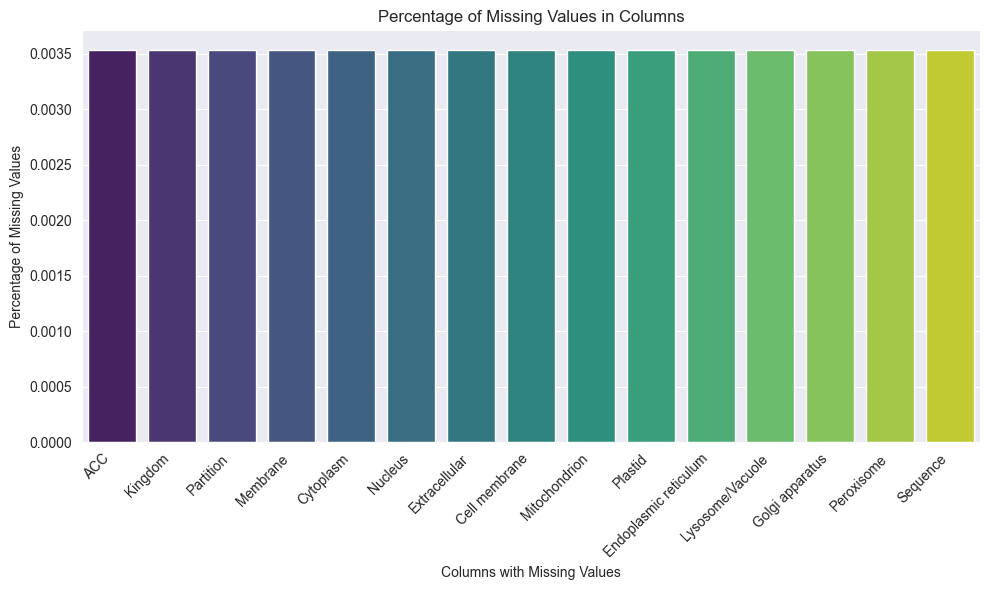

In [5]:
plot_missing_values(train_dev_data)

In [32]:
def visualize_class_distribution(dataframe, columns):
    """
    Generate and visualize class distribution for multiple columns in a DataFrame.

    Parameters:
    - dataframe: Pandas DataFrame
    - columns: List of column names to visualize

    Returns:
    - None (displays charts)
    """

    # Check if all columns exist in the DataFrame
    missing_columns = [col for col in columns if col not in dataframe.columns]
    if missing_columns:
        raise ValueError(f"Columns not found in DataFrame: {missing_columns}")

    # Initialize subplots
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))

    # Plot class distribution for each column
    for i, col in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes  # Handle single-column case
        sns.countplot(x=col, data=dataframe, ax=ax)
        ax.set_title(f"Class Distribution - {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

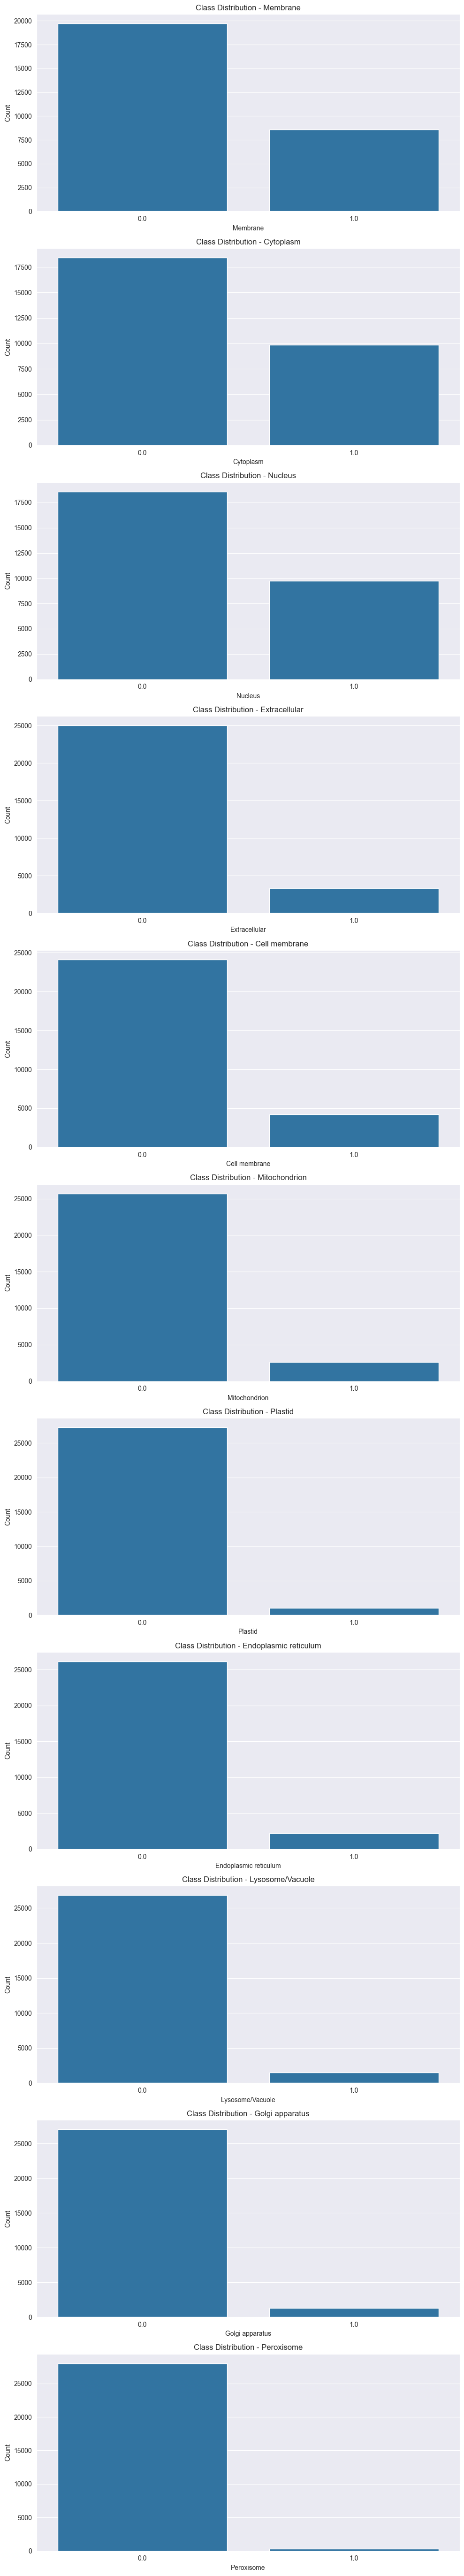

In [33]:
visualize_class_distribution(train_dev_data,['Membrane', 'Cytoplasm', 'Nucleus', 'Extracellular', 'Cell membrane', 'Mitochondrion', 'Plastid', 'Endoplasmic reticulum', 'Lysosome/Vacuole', 'Golgi apparatus', 'Peroxisome'])

In [52]:
def plot_label1_percentage(dataframe, selected_columns):
    """
    Plots the percentage of label 1 in each selected column of the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - selected_columns (list): List of column names to analyze.

    Returns:
    - None (plots the result using matplotlib)
    """

    # Check if selected columns exist in the DataFrame
    invalid_columns = [col for col in selected_columns if col not in dataframe.columns]
    if invalid_columns:
        print(f"Invalid columns: {invalid_columns}")
        return

    # Initialize a plot
    plt.figure(figsize=(20,13))

    # Plot the percentage of label 1 for each selected column
    for col in selected_columns:
        label_counts = dataframe[col].value_counts(normalize=True)
        if 1 in label_counts.index:
            label1_percentage = label_counts[1] * 100
            plt.bar(col, label1_percentage, label=f'{col} - Label 1')

    # Add labels and title
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Label 1')
    plt.title('Percentage of Label 1 in Selected Columns')
    plt.legend()

    # Show the plot
    plt.show()

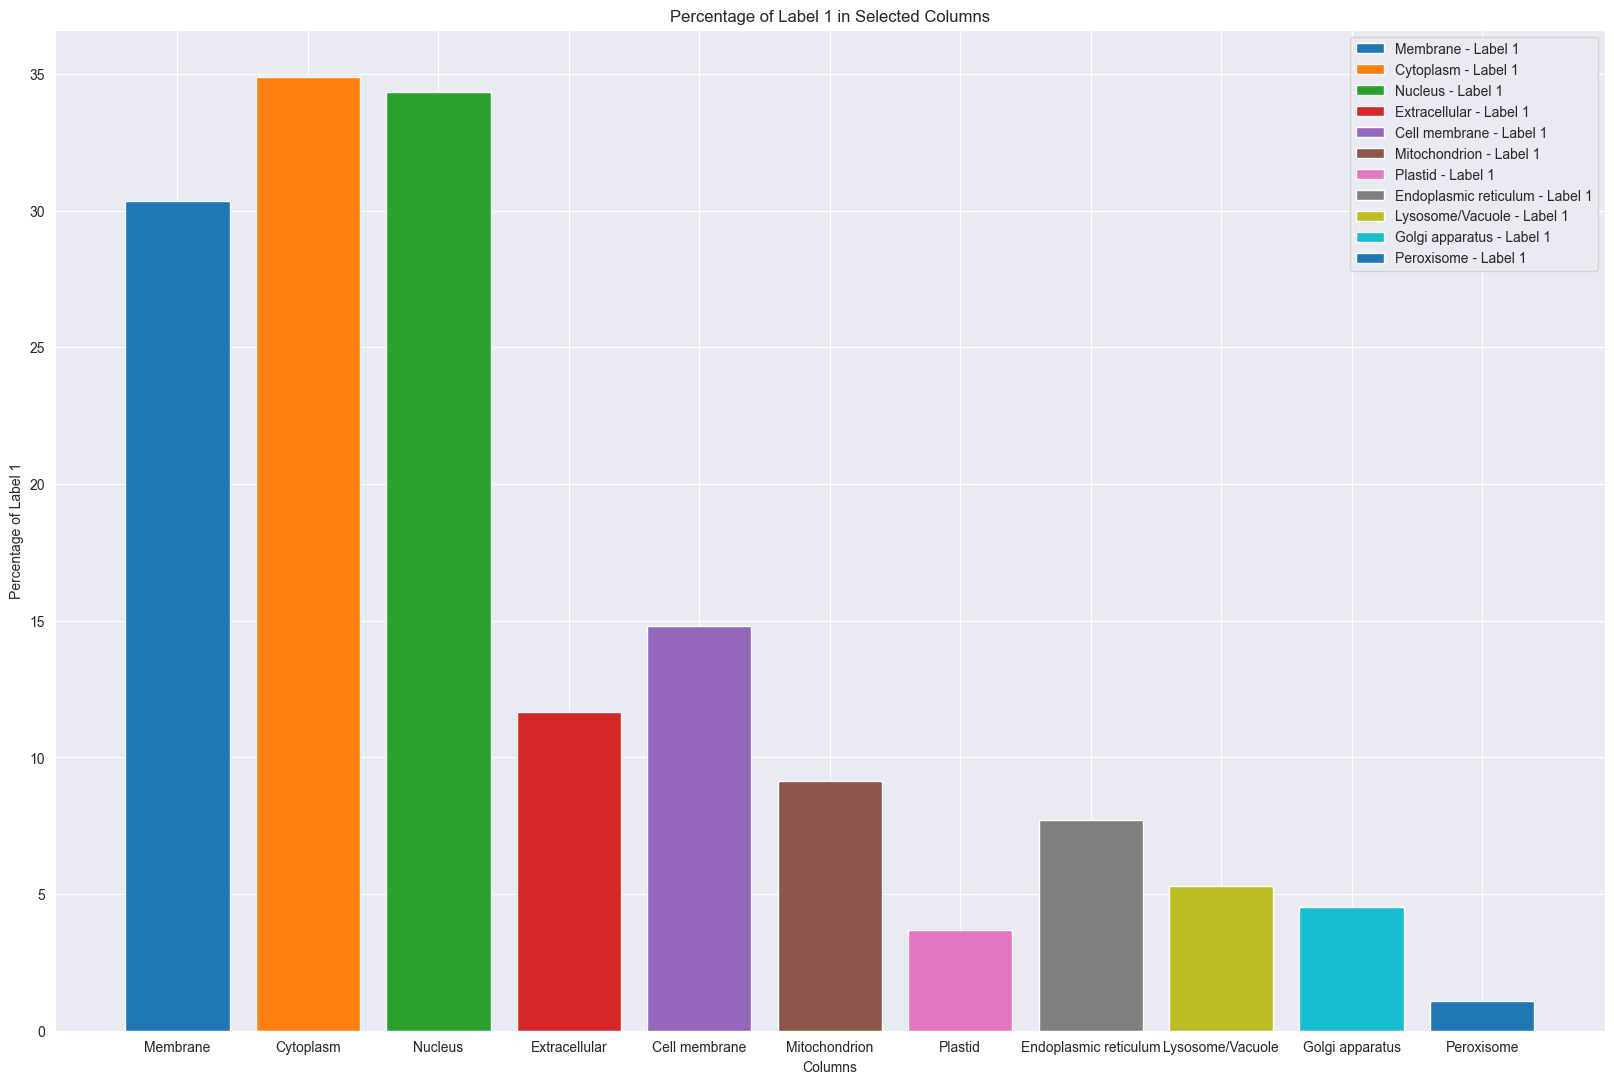

In [53]:
plot_label1_percentage(train_dev_data, ['Membrane', 'Cytoplasm', 'Nucleus', 'Extracellular', 'Cell membrane', 'Mitochondrion', 'Plastid', 'Endoplasmic reticulum', 'Lysosome/Vacuole', 'Golgi apparatus', 'Peroxisome'])

In [6]:
train_dev_data.dropna(inplace=True)

In [7]:
train_dev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28303 entries, 0 to 28303
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ACC                    28303 non-null  object 
 1   Kingdom                28303 non-null  object 
 2   Partition              28303 non-null  float64
 3   Membrane               28303 non-null  float64
 4   Cytoplasm              28303 non-null  float64
 5   Nucleus                28303 non-null  float64
 6   Extracellular          28303 non-null  float64
 7   Cell membrane          28303 non-null  float64
 8   Mitochondrion          28303 non-null  float64
 9   Plastid                28303 non-null  float64
 10  Endoplasmic reticulum  28303 non-null  float64
 11  Lysosome/Vacuole       28303 non-null  float64
 12  Golgi apparatus        28303 non-null  float64
 13  Peroxisome             28303 non-null  float64
 14  Sequence               28303 non-null  object 
dtypes: floa

In [8]:
def reformat_data_frame(data : pd.DataFrame):
    data=data.drop(['ACC','Kingdom','Partition'], axis=1)
    return data

In [9]:
reformatted_train_dev_data = reformat_data_frame(train_dev_data)

In [10]:
reformatted_train_dev_data.head()

,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...


In [13]:
reformatted_train_dev_data['Sequence'][0]

'MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDYGNGLESEELEPEELLLEPEPEPEPEEEPPRPRAPPGAPGPGPGSGAPGNQEEEEESGLVEGDPGDGAIEDPELEAIKARVREMEEEAEKLKELQNEVEKQMNMSPPPGNAGPVIMSIEEKMEADARSIYVGNVDYGATAEELEAHFHGCGSVNRVTILCDKFSGHPKGFAYIEFSDKESVRTSLALDESLFRGRQIKVIPKRTNRPGISTTDRGFPRARYRARTTNYNSSRSRFYSGFNSRPRGRVYRGRARATSWYSPY'

## Shuffle the Data

In [12]:
shuffled_train_dev_data = reformatted_train_dev_data.sample(frac=1, random_state=46)

In [13]:
shuffled_train_dev_data.head()

,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
25767,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,MTKDRLAALHAAQSDDEEETEVAVNVDGHDSYMDDFFAQVEEIRGM...
23390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,MSNGYRTLSQHLNDLKKENFSLKLRIYFLEERMQQKYEVSREDVYK...
6967,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MDMQVQRPITSGSRQAPDPYDQYLESRGLYRKHTARDASSLFRVIA...
13673,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MKCFLFPLGDKKDEQRSPKPVSPTSNFSDVNKSGSDFSPRDVSGTS...
26276,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,MTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATIGADFL...


## Save the Cleaned Data

In [14]:
shuffled_train_dev_data.to_csv('Preprocessed_Data/train_dev.csv', index=False)